In [1]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dir='../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir='../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir='../input/new-plant-diseases-dataset/test/test'

In [3]:
Size=150
X_test=[]
y_test=[]

In [4]:
from keras.preprocessing import image_dataset_from_directory
training_ds=image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size=(Size,Size),
    batch_size=64
)

Found 70295 files belonging to 38 classes.


In [5]:
from keras.preprocessing import image_dataset_from_directory
validing_ds=image_dataset_from_directory(
    valid_dir,
    seed=42,
    image_size=(Size,Size),
    batch_size=64
)

Found 17572 files belonging to 38 classes.


In [6]:
X_test=[]
for folder in os.listdir(test_dir):
    files=gb.glob(test_dir+'/*.JPG')
    for file in files :
        img=cv.imread(file)
        X_test.append(cv.resize(img,(Size,Size)))

In [7]:
X_test=np.array(X_test)
print(X_test.shape)

(1089, 150, 150, 3)


In [8]:
X_test=X_test/255.0

In [9]:
import keras
from keras.layers import Flatten , Dense , Dropout , BatchNormalization , MaxPooling2D ,Conv2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping 
#from keras.applications import vgg19

In [10]:
callbacks=EarlyStopping(mode='max',patience=10,restore_best_weights=True)

In [11]:
model=Sequential([
                  Conv2D(32,3,activation='relu',kernel_initializer='he_normal',input_shape=(Size,Size,3)),
                  MaxPooling2D(3),
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
                  MaxPooling2D(3),
                  #vgg19(include_top=False,input_shape=(Size,Size,3)),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dropout(0.2),
                  BatchNormalization(),
                  Dense(128,activation='relu'),
                  Dropout(0.2),
                  BatchNormalization(),
                  Dense(38,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(training_ds,validation_data=validing_ds,epochs=20,callbacks=[callbacks],verbose=2)

Epoch 1/20
1099/1099 - 561s - loss: 1.7133 - accuracy: 0.5035 - val_loss: 1.3737 - val_accuracy: 0.5946
Epoch 2/20
1099/1099 - 153s - loss: 1.1623 - accuracy: 0.6439 - val_loss: 0.8025 - val_accuracy: 0.8048
Epoch 3/20
1099/1099 - 151s - loss: 0.7187 - accuracy: 0.7735 - val_loss: 1.0155 - val_accuracy: 0.8626
Epoch 4/20
1099/1099 - 153s - loss: 0.5910 - accuracy: 0.8114 - val_loss: 0.7559 - val_accuracy: 0.8679
Epoch 5/20
1099/1099 - 152s - loss: 0.4550 - accuracy: 0.8545 - val_loss: 1.3428 - val_accuracy: 0.8701
Epoch 6/20
1099/1099 - 194s - loss: 0.3871 - accuracy: 0.8755 - val_loss: 1.0443 - val_accuracy: 0.6982
Epoch 7/20
1099/1099 - 187s - loss: 0.3621 - accuracy: 0.8836 - val_loss: 0.4588 - val_accuracy: 0.9148
Epoch 8/20
1099/1099 - 178s - loss: 0.3335 - accuracy: 0.8920 - val_loss: 0.9639 - val_accuracy: 0.9047
Epoch 9/20
1099/1099 - 152s - loss: 0.2544 - accuracy: 0.9166 - val_loss: 0.4053 - val_accuracy: 0.9310
Epoch 10/20
1099/1099 - 152s - loss: 0.2191 - accuracy: 0.9283 -

In [14]:
ModelLoss, ModelAccuracy = model.evaluate(validing_ds)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

275/275 [==============================] - 30s 108ms/step - loss: 1.3711 - accuracy: 0.5946
Test Loss is 1.3710578680038452
Test Accuracy is 0.5946391820907593


In [15]:
y_pred=model.predict(X_test)

In [16]:
Y_pred=y_pred.argmax()

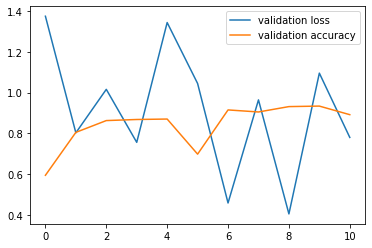

In [17]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()